# Clustering of Wholesale Customers

# Clustering of Travel Reviews


## Introduction / Overview


## The dataset

- #### What is the purpose of this dataset?


- #### What are the features? 



- #### What are the targets? 




In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.metrics import adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score

In [68]:
wholesale_customer_data_csv = pd.read_csv('Wholesale_customers_data.csv',sep=',')
true_labels = wholesale_customer_data_csv['Region']
dataset = wholesale_customer_data_csv.drop(columns='Region')


dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Fresh             440 non-null    int64
 2   Milk              440 non-null    int64
 3   Grocery           440 non-null    int64
 4   Frozen            440 non-null    int64
 5   Detergents_Paper  440 non-null    int64
 6   Delicassen        440 non-null    int64
dtypes: int64(7)
memory usage: 24.2 KB


In [69]:
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset)

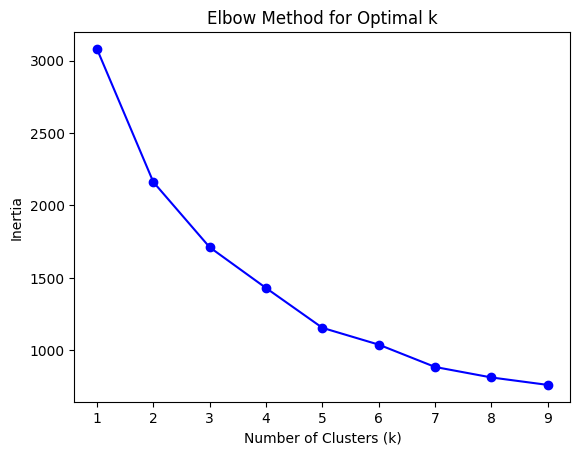

In [70]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the range of k values to test
k_values = range(1, 10)

# For each k, fit a KMeans model and calculate inertia (sum of squared distances)
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dataset_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [80]:
# Assuming k=3 based on the Elbow Method or other criteria
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(dataset_scaled)

# Get cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to the original dataframe (optional)
dataset['Cluster'] = labels


In [81]:

ari = adjusted_rand_score(true_labels, labels)
print(f'Adjusted Rand Index: {ari}')

homogeneity = homogeneity_score(true_labels, labels)
print(f'Homogeneity: {homogeneity}')

completeness = completeness_score(true_labels, labels)
print(f'Completeness: {completeness}')

v_measure = v_measure_score(true_labels, labels)
print(f'V-Measure: {v_measure}')

sil_score = silhouette_score(dataset_scaled, labels)
print(f'Silhouette Score: {sil_score}')

dbi = davies_bouldin_score(dataset_scaled, labels)
print(f'Davies-Bouldin Index: {dbi}')


Adjusted Rand Index: -0.015749656877133814
Homogeneity: 0.006493711567592393
Completeness: 0.006957302739866193
V-Measure: 0.006717518285005429
Silhouette Score: 0.43916005773275374
Davies-Bouldin Index: 1.0578126093969267


In [73]:
'''# Silhouette score to evaluate clustering
sil_score = silhouette_score(dataset_scaled, kmeans.labels_)
print(f'Silhouette Score: {sil_score}')

dbi = davies_bouldin_score(dataset_scaled, kmeans.labels_)
print(f'Davies-Bouldin Index: {dbi}')
''';

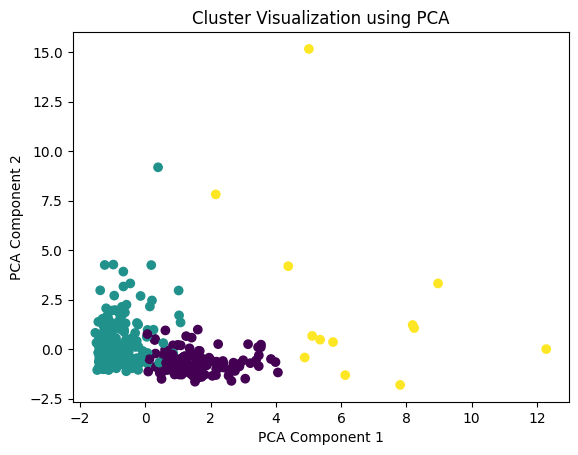

In [74]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(dataset_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Visualization using PCA')
plt.show()

In [75]:
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples based on your data
predicted_labels1 = dbscan.fit_predict(dataset_scaled)

dataset['Cluster'] = predicted_labels1

dataset['Cluster'].value_counts()

Cluster
 1    201
-1    194
 0     32
 3      8
 2      5
Name: count, dtype: int64

In [76]:
sil_score = silhouette_score(dataset_scaled[predicted_labels1 != -1], predicted_labels1[predicted_labels1 != -1])
print(f'Silhouette Score: {sil_score}')

dbi = davies_bouldin_score(dataset_scaled, predicted_labels1)
print(f'Davies-Bouldin Index: {dbi}')


Silhouette Score: 0.4978742250035533
Davies-Bouldin Index: 1.7444505952841909


In [77]:
ari = adjusted_rand_score(true_labels, predicted_labels1)
homogeneity = homogeneity_score(true_labels, predicted_labels1)
completeness = completeness_score(true_labels, predicted_labels1)
v_measure = v_measure_score(true_labels, predicted_labels1)

print(f'Adjusted Rand Index: {ari}')
print(f'Homogeneity: {homogeneity}')
print(f'Completeness: {completeness}')
print(f'V-Measure: {v_measure}')

Adjusted Rand Index: -0.015591678977594177
Homogeneity: 0.01414234364976026
Completeness: 0.010698113062642942
V-Measure: 0.012181450050420465
